# 1. Importowanie zbioru danych

In [28]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16
sns.set_context('paper', font_scale=1.4)

In [4]:
# Całośc danych

data = pd.read_csv ('german_credit_data_dataset.csv')
data

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1,A191,A201,1
996,A11,30,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1,A192,A201,1
997,A14,12,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1,A191,A201,1
998,A11,45,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1,A192,A201,2


## Podział danych
Dane zostaną podzielone na 70% do analizy i 30% do wailadcji.

In [5]:
data_train, data_test = train_test_split(
    data,
    test_size=0.3, random_state=420)

In [6]:
# Dane do analizy

data_train

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
910,A14,36,A33,A43,4454.0,A61,A73,4.0,A92,A101,...,A121,34.0,A143,A152,2.0,A173,1,A191,A201,1
209,A14,12,A32,A41,1413.0,A64,A74,3.0,A93,A101,...,A122,55.0,A143,A152,1.0,A173,1,A191,A202,1
402,A14,24,A33,A49,8648.0,A61,A72,2.0,A93,A101,...,A123,27.0,A141,A152,2.0,A173,1,A192,A201,2
428,A14,9,A32,A42,1313.0,A61,A75,1.0,A93,A101,...,A123,20.0,A143,A152,1.0,A173,1,A191,A201,1
697,A14,12,A34,A40,926.0,A61,A71,1.0,A92,A101,...,A122,38.0,A143,A152,1.0,A171,1,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,A12,9,A32,A40,1549.0,A65,A72,4.0,A93,A101,...,A121,35.0,A143,A152,1.0,A171,1,A191,A201,1
575,A14,15,A34,A42,2788.0,A61,A74,2.0,A92,A102,...,A123,24.0,A141,A152,2.0,A173,1,A191,A201,1
390,A14,18,A32,A40,1820.0,A61,A73,2.0,A94,A101,...,A122,30.0,A143,A152,1.0,A174,1,A192,A201,1
72,A11,8,A34,A410,1164.0,A61,A75,3.0,A93,A101,...,A124,51.0,A141,A153,2.0,A174,2,A192,A201,1


In [7]:
# Dane do walidacji

data_test

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
715,A14,30,A34,A41,7596.0,A65,A75,1.0,A93,A101,...,A123,63.0,A143,A152,2.0,A173,1,A191,A201,1
353,A11,12,A30,A43,6199.0,A61,A73,4.0,A93,A101,...,A122,28.0,A143,A151,2.0,A173,1,A192,A201,2
507,A12,15,A31,A40,6850.0,A62,A71,1.0,A93,A101,...,A122,34.0,A143,A152,1.0,A174,2,A192,A201,2
713,A11,9,A34,A43,1138.0,A61,A73,4.0,A93,A101,...,A121,25.0,A143,A152,2.0,A172,1,A191,A201,1
553,A12,12,A34,A40,1995.0,A62,A72,4.0,A93,A101,...,A123,27.0,A143,A152,1.0,A173,1,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,A12,15,A32,A43,802.0,A61,A75,4.0,A93,A101,...,A123,37.0,A143,A152,1.0,A173,2,A191,A201,2
202,A14,27,A33,A49,5117.0,A61,A74,3.0,A93,A101,...,A123,26.0,A143,A152,2.0,A173,1,A191,A201,1
745,A11,13,A34,A49,1797.0,A61,A72,3.0,A93,A101,...,A122,28.0,A141,A152,2.0,A172,1,A191,A201,1
743,A11,24,A31,A42,2483.0,A63,A73,4.0,A93,A101,...,A121,22.0,A142,A152,1.0,A173,1,A192,A201,1


# 2. Eksploracyjna analiza danych

In [8]:
# Pierwsze wiersze danych

df = data_train
df.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
910,A14,36,A33,A43,4454.0,A61,A73,4.0,A92,A101,...,A121,34.0,A143,A152,2.0,A173,1,A191,A201,1
209,A14,12,A32,A41,1413.0,A64,A74,3.0,A93,A101,...,A122,55.0,A143,A152,1.0,A173,1,A191,A202,1
402,A14,24,A33,A49,8648.0,A61,A72,2.0,A93,A101,...,A123,27.0,A141,A152,2.0,A173,1,A192,A201,2
428,A14,9,A32,A42,1313.0,A61,A75,1.0,A93,A101,...,A123,20.0,A143,A152,1.0,A173,1,A191,A201,1
697,A14,12,A34,A40,926.0,A61,A71,1.0,A92,A101,...,A122,38.0,A143,A152,1.0,A171,1,A191,A201,1


In [9]:
# Ostatnie wiersze danych

df.tail()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
799,A12,9,A32,A40,1549.0,A65,A72,4.0,A93,A101,...,A121,35.0,A143,A152,1.0,A171,1,A191,A201,1
575,A14,15,A34,A42,2788.0,A61,A74,2.0,A92,A102,...,A123,24.0,A141,A152,2.0,A173,1,A191,A201,1
390,A14,18,A32,A40,1820.0,A61,A73,2.0,A94,A101,...,A122,30.0,A143,A152,1.0,A174,1,A192,A201,1
72,A11,8,A34,A410,1164.0,A61,A75,3.0,A93,A101,...,A124,51.0,A141,A153,2.0,A174,2,A192,A201,1
945,A12,48,A30,A40,8358.0,A63,A72,1.0,A92,A101,...,A123,30.0,A143,A152,2.0,A173,1,A191,A201,1


## Analiza typów zmiennych


### Zmienne jakościowe
 - binarne (dwie wartości) z reguły true/false
 - nominalne (nieuporządkowane) np. rasa psa
 - uporządkowane np. wykształcenie podstawowe -> średnie -> wyższe

### Zmienne ilościowe
 - zliczenia/porządkowe (liczba wystąpień pewnego zdarzenia, liczba całkowita) np. wiek osoby, odwiedziny na stronie
 - ilorazowe (skala, w której jest sens mówić o wielokrotnościach danej wielkości) np. długość w metrach
 - przedziałowe (mierzone w skali, w której można dodawać/odejmować wartości) np. data, ale też temperatura w stopniach Celsjusza


W danych występuje 8 zmiennych ilościowych oraz 13 jakościowych.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 910 to 945
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  700 non-null    object 
 1   duration                 700 non-null    int64  
 2   credit_history           700 non-null    object 
 3   purpose                  700 non-null    object 
 4   credit_amount            700 non-null    float64
 5   savings                  700 non-null    object 
 6   present_employment       700 non-null    object 
 7   installment_rate         700 non-null    float64
 8   personal                 700 non-null    object 
 9   other_debtors            700 non-null    object 
 10  present_residence        700 non-null    float64
 11  property                 700 non-null    object 
 12  age                      700 non-null    float64
 13  other_installment_plans  700 non-null    object 
 14  housing                 

In [11]:
# Analiza statystyczna zmiennych ilościowych

df.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,21.165714,3358.674286,2.961429,2.877143,35.985714,1.408571,1.165714,1.311429
std,12.069943,2949.856973,1.114323,1.074769,11.514987,0.584918,0.372090,0.463409
min,4.000000,276.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1381.750000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2359.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,4009.500000,4.000000,4.000000,43.000000,2.000000,1.000000,2.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


### Zmienne w danych

In [12]:
# Kolumny danych

df.columns

Index(['checking_account_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'present_employment', 'installment_rate',
       'personal', 'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker', 'customer_type'],
      dtype='object')

Opis kolumn:

`checking_account_status` - string - Status of existing checking account (A11: < 0 DM, A12: 0 <= x < 200 DM, A13 : >= 200 DM / salary assignments for at least 1 year, A14 : no checking account)  
`duration`	- integer -	Duration in month  
`credit_history`	- string -	A30: no credits taken/ all credits paid back duly, A31: all credits at this bank paid back duly, A32: existing credits paid back duly till now, A33: delay in paying off in the past, A34 : critical account/ other credits existing (not at this bank)  
`purpose`	- string -	Purpose of Credit (A40 : car (new), A41 : car (used), A42 : furniture/equipment, A43 : radio/television, A44 : domestic appliances, A45 : repairs, A46 : education, A47 : (vacation - does not exist?), A48 : retraining, A49 : business, A410 : others)  
`credit_amount`	- float	  
`savings`	- string -	Savings in accounts/bonds (A61 : < 100 DM, A62 : 100 <= x < 500 DM, A63 : 500 <= x < 1000 DM, A64 : >= 1000 DM, A65 : unknown/ no savings account  
`present_employment`	- string -	A71 : unemployed, A72 : < 1 year, A73 : 1 <= x < 4 years, A74 : 4 <= x < 7 years, A75 : .. >= 7 years  
`installment_rate`	- float -	Installment Rate in percentage of disposable income  
`personal`	- string -	Personal Marital Status and Sex (A91 : male : divorced/separated, A92 : female : divorced/separated/married, A93 : male : single, A94 : male : married/widowed, A95 : female : single)  
`other_debtors`	- string -	A101 : none, A102 : co-applicant, A103 : guarantor  
`present_residence`	- float -	Present residence since  
`property`	- string -	A121 : real estate, A122 : if not A121 : building society savings agreement/ life insurance, A123 : if not A121/A122 : car or other, not in attribute 6, A124 : unknown / no property  
`age`	- float -	Age in years  
`other_installment_plans`	- string -	A141 : bank, A142 : stores, A143 : none  
`customer_type`	- integer -	Predictor Class: 1=Good, 2=Bad  

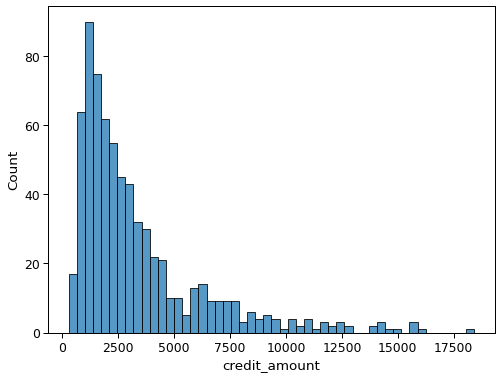

In [13]:
# Historgram zmiennej 'credit_amount'

sns.histplot(df['credit_amount'],bins = 50)
plt.show()

#### Korelacje

In [14]:
# Tabela korelacji

corr = df.corr()
corr.style.background_gradient()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
duration,1.000000,0.631445,0.102801,0.075681,-0.030688,0.047135,-0.042756,0.245253
credit_amount,0.631445,1.000000,-0.252368,0.060318,0.052072,0.061216,0.018405,0.144750
installment_rate,0.102801,-0.252368,1.000000,0.043819,0.032179,0.039577,-0.091523,0.109179
present_residence,0.075681,0.060318,0.043819,1.000000,0.283878,0.079961,0.033095,0.030973
age,-0.030688,0.052072,0.032179,0.283878,1.000000,0.138718,0.111741,-0.104528
existing_credits,0.047135,0.061216,0.039577,0.079961,0.138718,1.000000,0.115727,-0.042585
dependents,-0.042756,0.018405,-0.091523,0.033095,0.111741,0.115727,1.000000,-0.025933
customer_type,0.245253,0.144750,0.109179,0.030973,-0.104528,-0.042585,-0.025933,1.000000


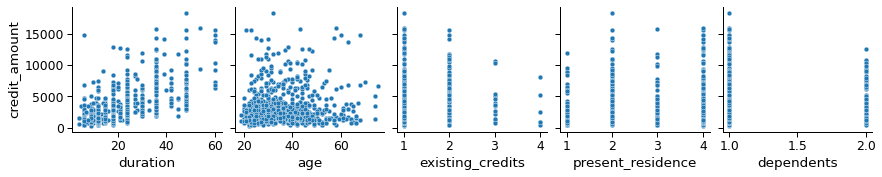

In [15]:
# Wykresy korelacji 'credit_amount' z niektórymi zmiennymi

sns.pairplot(df, y_vars = "credit_amount", x_vars = df.columns.values[[1,12,15,10,17]])
plt.show()

0.018405 - mała korelacja (bliska 0.0)

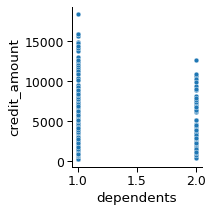

In [16]:
sns.pairplot(df, y_vars = "credit_amount", x_vars = "dependents", height=3)
plt.show()

0.631445 - widoczna zależność

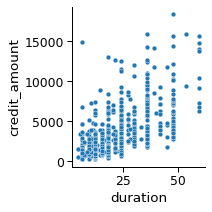

In [17]:
sns.pairplot(df, y_vars = "credit_amount", x_vars = "duration", height=3)
plt.show()

-0.252368 - ujemna zależność

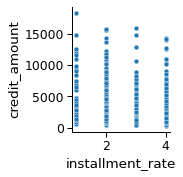

In [18]:
sns.pairplot(df, y_vars = "credit_amount", x_vars = "installment_rate")
plt.show()

Zależność zmiennej ilościowej od zmiennej jakościowej:

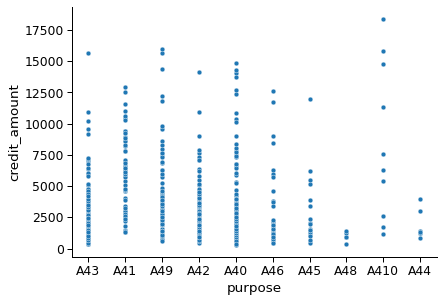

In [19]:
fig = sns.pairplot(df, y_vars = "credit_amount", x_vars = "purpose")
fig.fig.set_size_inches(10,5)

Najniższe wartości kredytów w celu przekwalifikowania (wartość zmiennej `purpose` równa "A48"), a najwyższe i najbardziej rozłożone w celach biznesowych ("A49", wartość "A410" odpowiada innym celom). 

## Brakujące dane

In [20]:
df_clean = df.dropna()
print(df_clean.shape)
print(df.shape)

(700, 21)
(700, 21)


Nie ma braków w naszych danych.

## Rozkłady zmiennych

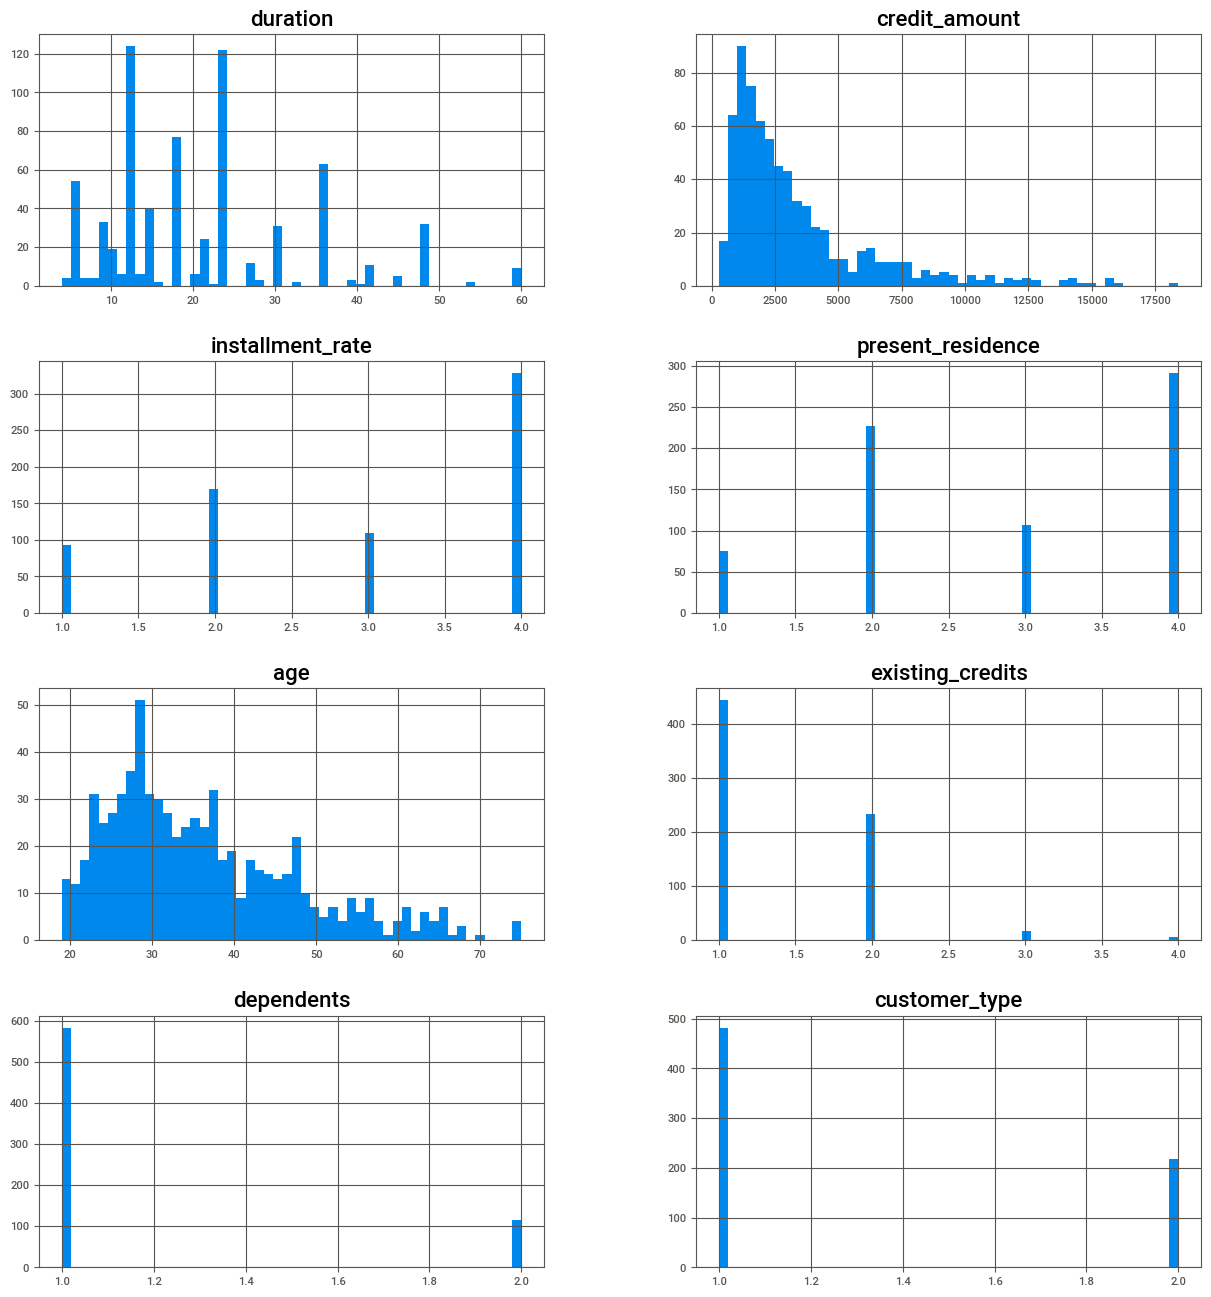

In [45]:
df.hist(bins = 50, figsize = (15,25), layout=(6,2))
plt.show()

## Wartości odstające (outliers)

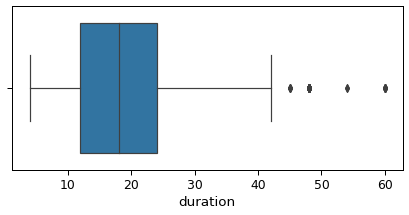

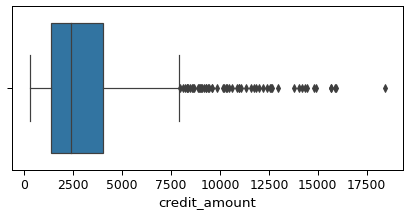

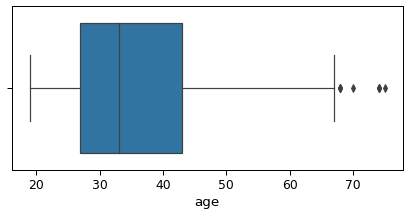

In [22]:
for col in ["duration", "credit_amount", "age"]:
    plt.figure(figsize=(7,3))
    sns.boxplot(data=df, x=col)
    plt.show()

# 3. Automatyczna eksploracja danych

In [23]:
import sweetviz

In [ ]:
my_report  = sweetviz.analyze(df)
#my_report  = sweetviz.analyze(df, target_feat='credit_amount')
my_report.show_html('FinalReport.html')

# 4. transformacja zmiennych do rozkladu normalnego

rozważamy zmienne silnie skorelowane - `duration` oraz `credit_amount`

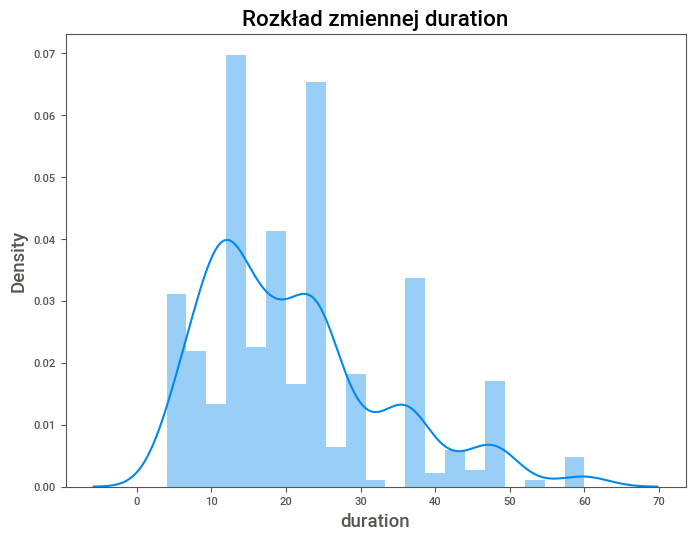

In [39]:
duration_dist = sns.distplot(df['duration'])
duration_dist.set_title('Rozkład zmiennej duration')
plt.show()

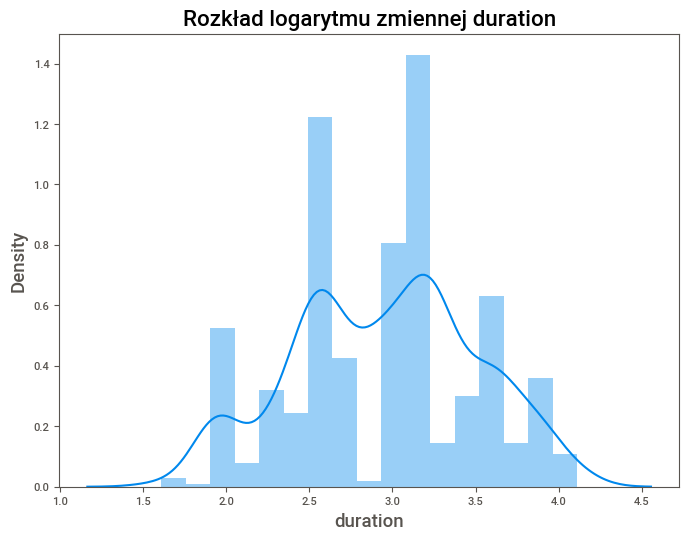

In [40]:
duration_log_dist = sns.distplot(np.log1p(df['duration']))
duration_log_dist.set_title('Rozkład logarytmu zmiennej duration')
plt.show()

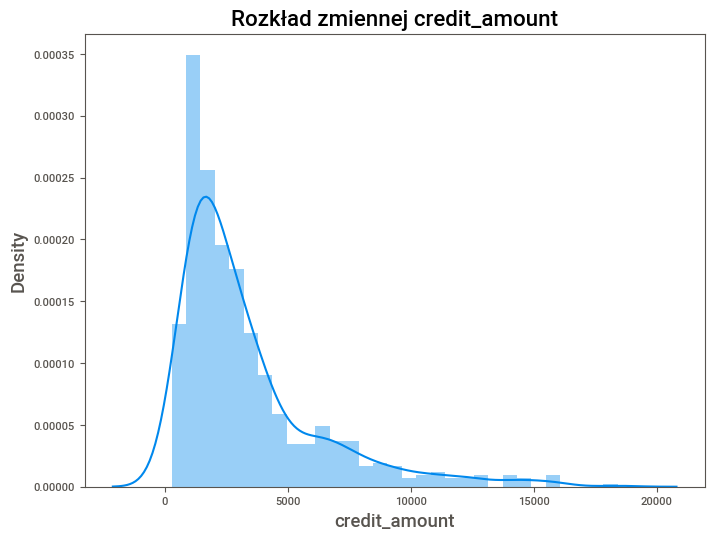

In [35]:
ca_dist = sns.distplot(df['credit_amount'])
ca_dist.set_title('Rozkład zmiennej credit_amount')
plt.show()

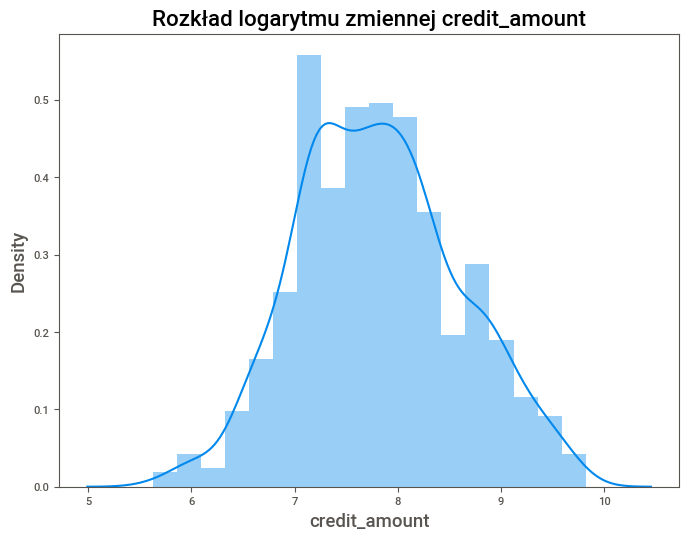

In [36]:
ca_log_dist = sns.distplot(np.log1p(df['credit_amount']))
ca_log_dist.set_title('Rozkład logarytmu zmiennej credit_amount')
plt.show()

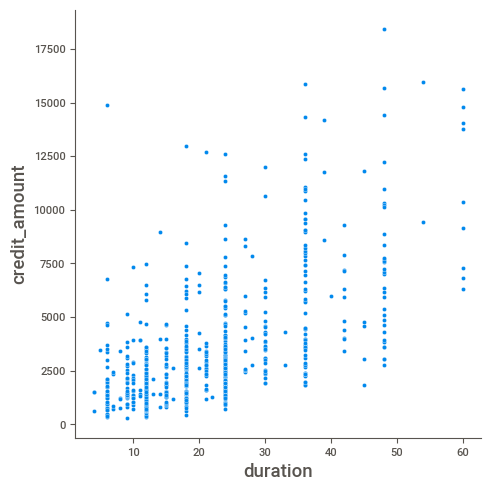

In [26]:
sns.pairplot(df, y_vars = "credit_amount", x_vars = "duration", height = 5)
plt.show()

# 5 podsumowanie

## jednowymiarowe rozklady

1. najwięcej kredytów bierze sie na niskie wartości, im wyższa wartość kredytu, tym mniej ich jest
2. najwięcej kredytów biorą ludzie chwile przed 30 rokiem życia, pewnie wtedy zakladają rodziny
3. im więcej kredytów już osoba ma, tym mniejsza szansa że zaciągnie kolejny kredyt
4. najwięcej kredytów zaciągane jest na pełne lata (12, 24, 36, 48, 60 m-cy), mamy mniej kredytów z dłuższym spłacaniem

## dwuwymiarowe rozkłady

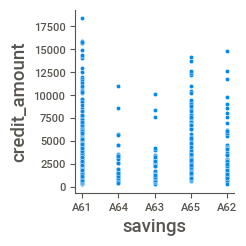

In [48]:
sns.pairplot(df, y_vars = 'credit_amount', x_vars = 'savings')
plt.show()

1. interesujące, że największe kredyty biorą ludzie, którzy na swoim koncie bankowym nie mają zbyt wiele
2. silnie skorelowane są zmienne `credit_amount` oraz `duration`, ale to w zasadzie bardzo spodziewane
3. większe kredyty biorą ludzie, którzy mają na swoim utrzymaniu mniej osób
4. delikatna odwrotna korelacja między `installment_rate`, a `credit_amount`, im wyższy kredyt, tym niższa rata kredytu (dość to interesujące, ciekawe właściwie dlaczego tak jest)


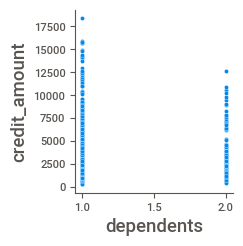

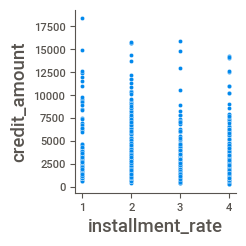

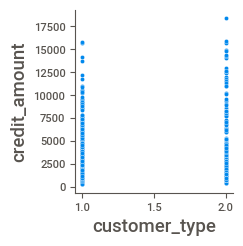

In [58]:
sns.pairplot(df, x_vars = 'dependents', y_vars = 'credit_amount')
sns.pairplot(df, x_vars = 'installment_rate', y_vars = 'credit_amount')
plt.show()